Importing necessary libraries

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load the dataset

In [34]:
df = pd.read_csv("./diabetes.csv")

# Step 2: Data Preprocessing

Check for any null values

In [35]:
print("Null values:\n", df.isnull().sum())

Null values:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


Define feature set (X) and target variable (y)

In [36]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Step 3: Split the dataset into training and testing sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Data Normalization (KNN benefits from scaling)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Implement K-Nearest Neighbors

In [39]:
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Step 6: Make Predictions

In [40]:
y_pred = knn.predict(X_test)

# Step 7: Compute Performance Metrics

In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Error Rate
error_rate = 1 - accuracy

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

In [42]:
# Print results
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Confusion Matrix:
 [[119  32]
 [ 37  43]]
Accuracy: 0.7013
Error Rate: 0.2987
Precision: 0.5733
Recall: 0.5375


# Step 8: Visualizations

Confusion Matrix Heatmap

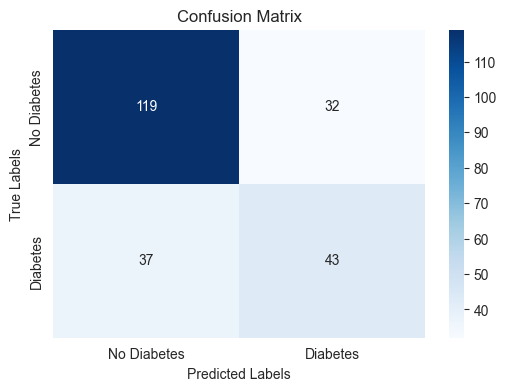

In [43]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Performance Metrics Bar Plot

In [44]:
metrics = ["Accuracy", "Error Rate", "Precision", "Recall"]
values = [accuracy, error_rate, precision, recall]

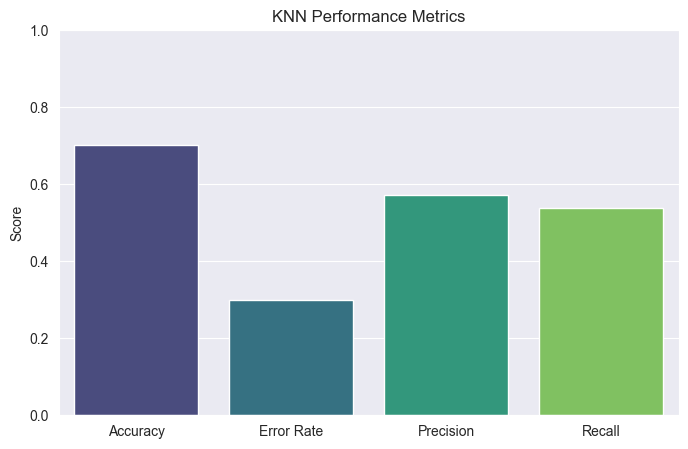

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.ylim(0, 1)
plt.title("KNN Performance Metrics")
plt.ylabel("Score")
plt.show()

In [46]:
df["Prediction"]=knn.predict(df.drop("Outcome", axis=1))

In [47]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome,Prediction
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,1
766,1,126,60,0,0,30.1,0.349,47,1,1
